Eye pixel location: (px: 215, py: 188)
Cat's left eye approximate center coordinates: (x: 215, y: 188)
Eye pixel location: (px: 215, py: 188)
Custom pixel location: (px: 150, py: 160)
Custom coordinates: (x: 150, y: 160)


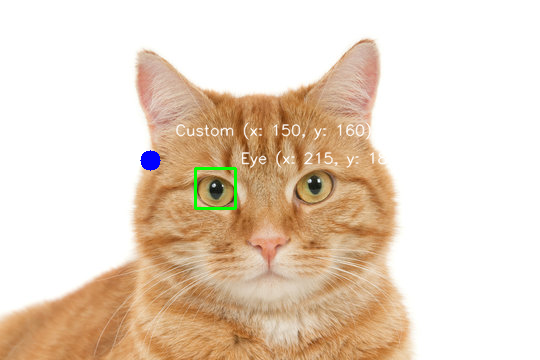

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def get_eye_coordinates(image_path):
    """
    Loads an image, detects the cat's left eye using Haar cascade,
    and returns the eye's approximate center coordinates.

    Args:
        image_path (str): Path to the image file.

    Returns:
        tuple: A tuple containing the (x, y) coordinates of the detected eye,
               or None if fails.
    """
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not load image from {image_path}")
            return None

        # Load the Haar cascade for cat eyes
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        if eye_cascade.empty():
            print("Error: Could not load eye cascade classifier.")
            return None

        # Convert image to grayscale for better detection
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect eyes using the cascade classifier
        eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Assuming the left eye is the first detected eye
        if len(eyes) > 0:
            x, y, w, h = eyes[0]
            # Approximate center coordinates of the eye bounding box
            eye_center_x = x + int(w / 2)
            eye_center_y = y + int(h / 2)
            return eye_center_x, eye_center_y
        else:
            print("Error: No eyes detected in the image.")
            return None
    except Exception as e:
        print(f"Error: An error occurred - {e}")
        return None

def display_cat_face(image_path, eye_coordinates, custom_coordinates):
    """
    Loads an image and displays the cat's face with annotated eye and custom positions.

    Args:
        image_path (str): Path to the image file.
        eye_coordinates (tuple): Tuple containing (x, y) coordinates of the detected eye.
        custom_coordinates (tuple): Tuple containing custom (x, y) coordinates.

    Returns:
        None
    """
    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not load image from {image_path}")
            return

        # Draw a rectangle around the detected eye
        if eye_coordinates is not None:
            x, y = eye_coordinates
            cv2.rectangle(image, (x - 20, y - 20), (x + 20, y + 20), (0, 255, 0), 2)
            # Annotate the eye coordinates
            cv2.putText(image, f'Eye (x: {x}, y: {y})', (x + 25, y - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # Annotate the custom coordinates
        if custom_coordinates is not None:
            cx, cy = custom_coordinates
            cv2.circle(image, (cx, cy), 10, (255, 0, 0), -1)
            cv2.putText(image, f'Custom (x: {cx}, y: {cy})', (cx + 25, cy - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # Display the image with annotations
        cv2_imshow(image)
    except Exception as e:
        print(f"Error: An error occurred - {e}")

def pixel_to_coordinates(px, py):
    """
    Converts pixel location to corresponding (x, y) coordinates.

    Args:
        px (int): Pixel location along the x-axis (column index).
        py (int): Pixel location along the y-axis (row index).

    Returns:
        tuple: Corresponding (x, y) coordinates.
    """
    return px, py

# Example usage
if __name__ == "__main__":
    image_path = "/content/drive/MyDrive/face cat.jpg"
    eye_coordinates = get_eye_coordinates(image_path)
    custom_coordinates = (150, 160)  # Custom coordinates

    if eye_coordinates is not None:
        x, y = eye_coordinates
        print(f"Eye pixel location: (px: {x}, py: {y})")
        print(f"Cat's left eye approximate center coordinates: (x: {x}, y: {y})")

        # Convert the eye coordinates to pixel values
        px, py = pixel_to_coordinates(x, y)
        print(f"Eye pixel location: (px: {px}, py: {py})")

        # Convert the custom coordinates to pixel values
        px_custom, py_custom = pixel_to_coordinates(custom_coordinates[0], custom_coordinates[1])
        print(f"Custom pixel location: (px: {px_custom}, py: {py_custom})")
        print(f"Custom coordinates: (x: {custom_coordinates[0]}, y: {custom_coordinates[1]})")

        display_cat_face(image_path, eye_coordinates, custom_coordinates)
    else:
        print("Failed to detect eye.")
